# 1. Import libraries

In [63]:
!pip install ptitprince

In [64]:
%%capture
import ptitprince as pt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 2. Import Data

In [65]:
title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

In [66]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [67]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')
print(f"The Original dataset hss {original.shape[0]} rows and {original.shape[1]} columns")

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns
The Original dataset hss 2111 rows and 17 columns


## 2.1. Original Data

In [68]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [69]:
original.describe().style.background_gradient(cmap='YlOrRd', axis=1)

## 2.2. Training Data

In [70]:
#Let's check the samples of data
display('Train:',df_train.sample(15))
# display('Test:',df_test.head())

'Train:'

id  Gender        Age    Height      Weight  \
15661  15661  Female  22.000000  1.710000   69.000000   
3124    3124  Female  21.556361  1.637396   67.999778   
9411    9411    Male  34.970367  1.769269   84.729197   
6822    6822  Female  21.491055  1.792378  160.935351   
16424  16424  Female  18.907514  1.746411  133.676663   
11045  11045    Male  21.000000  1.580000   68.000000   
7951    7951  Female  21.000000  1.600000   50.000000   
15200  15200  Female  18.000000  1.524926   41.397378   
24        24    Male  18.000000  1.753321   52.058335   
14082  14082  Female  17.000000  1.740000   56.000000   
20743  20743  Female  19.000000  1.740000   78.000000   
4443    4443  Female  21.834894  1.728834   50.000000   
18513  18513  Female  19.000000  1.530000   45.000000   
6010    6010    Male  20.552695  1.716677  104.879602   
14659  14659  Female  20.000000  1.540000   74.000000   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
15661                             no  yes  2.000000  1.000000          no   
3124                             yes   no  2.457547  1.000000   Sometimes   
9411                             yes  yes  2.000000  3.000000   Sometimes   
6822                             yes  yes  3.000000  3.000000   Sometimes   
16424                            yes  yes  3.000000  3.000000   Sometimes   
11045                             no  yes  2.000000  3.000000          no   
7951                              no  yes  3.000000  3.000000  Frequently   
15200                             no  yes  1.168856  1.000000   Sometimes   
24                               yes  yes  2.000000  3.000000   Sometimes   
14082                            yes  yes  2.000000  4.000000  Frequently   
20743                            yes  yes  3.000000  1.000000   Sometimes   
4443                             yes  yes  1.031149  3.612941  Frequently   
18513                             no   no  3.000000  3.000000  Frequently   
6010                             yes  yes  2.000000  1.915400   Sometimes   
14659                            yes   no  3.000000  1.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
15661    no  1.000000  no  1.000000  0.000000  Sometimes   
3124     no  2.000000  no  0.000000  0.474216         no   
9411     no  2.000000  no  2.462269  0.000000  Sometimes   
6822     no  2.358088  no  0.985872  0.937492  Sometimes   
16424    no  2.868679  no  1.510398  0.906611  Sometimes   
11045    no  2.000000  no  1.000000  0.000000  Sometimes   
7951     no  1.000000  no  1.000000  0.000000  Sometimes   
15200    no  1.166655  no  0.783676  0.000000  Sometimes   
24       no  2.072194  no  0.680464  1.258881         no   
14082    no  2.000000  no  2.000000  1.000000  Sometimes   
20743    no  2.000000  no  1.000000  0.000000  Sometimes   
4443     no  1.000000  no  0.546402  0.975540  Sometimes   
18513    no  2.000000  no  2.000000  0.000000  Sometimes   
6010     no  1.846626  no  0.000000  1.413375         no   
14659    no  3.000000  no  3.000000  0.000000  Sometimes   

                      MTRANS           NObeyesdad  
15661  Public_Transportation   Overweight_Level_I  
3124   Public_Transportation  Overweight_Level_II  
9411              Automobile  Overweight_Level_II  
6822   Public_Transportation     Obesity_Type_III  
16424  Public_Transportation     Obesity_Type_III  
11045  Public_Transportation   Overweight_Level_I  
7951   Public_Transportation        Normal_Weight  
15200  Public_Transportation  Insufficient_Weight  
24     Public_Transportation  Insufficient_Weight  
14082  Public_Transportation  Insufficient_Weight  
20743  Public_Transportation   Overweight_Level_I  
4443   Public_Transportation  Insufficient_Weight  
18513  Public_Transportation  Insufficient_Weight  
6010   Public_Transportation      Obesity_Type_II  
14659  Public_Transportation  Overweight_Level_II

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**Both the Original data and the train data has similar statistical characteristics**

In [72]:
df_train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [73]:
info = pd.concat([df_train.count(),original.count()],axis=1, keys=['df_train', 'original'])
print(info)

                                df_train  original
id                                 20758       NaN
Gender                             20758    2111.0
Age                                20758    2111.0
Height                             20758    2111.0
Weight                             20758    2111.0
family_history_with_overweight     20758    2111.0
FAVC                               20758    2111.0
FCVC                               20758    2111.0
NCP                                20758    2111.0
CAEC                               20758    2111.0
SMOKE                              20758    2111.0
CH2O                               20758    2111.0
SCC                                20758    2111.0
FAF                                20758    2111.0
TUE                                20758    2111.0
CALC                               20758    2111.0
MTRANS                             20758    2111.0
NObeyesdad                         20758    2111.0


**Both the Original data and the train data has similar statistical characteristics**

In [74]:
df_train.drop(columns=["id"], inplace=True)

In [75]:
def rename(dataframe):
    new_column_names = {
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Fam_history',
    'FAVC': 'Caloric_food',
    'FCVC': 'Veg',
    'NCP': 'Main_meals',
    'CAEC': 'Foods_betwn_meals',
    'SMOKE': 'Smoker',
    'CH2O': 'Water_consume',
    'SCC': 'Calories_monitored',
    'FAF': 'Physical_activity',
    'TUE': 'Tech_addict',
    'CALC': 'Alcohol_consume',
    'MTRANS': 'Transport',
    'NObeyesdad': 'Obesity_Risk'
    }
    dataframe.rename(columns=new_column_names, inplace=True)
    return dataframe
df_train=rename(df_train)
original = rename(original)

In [76]:
cat_cols = [ cols for cols in df_train.columns if df_train[cols].dtype == 'object' ]
num_cols = [ cols for cols in df_train.columns if df_train[cols].dtype != 'object' ]

In [77]:
df_train.describe().style.background_gradient(cmap='YlOrRd', axis=1)

*  <b>Age:</b> As per the quartile values, the majority of individuals falls between the ages of 20 to 26. On average, most individuals are around the age 23~24  
* <b>Height: </b> Typically individuals are around 1.7 meters tall.
* <b>Weight: </b> The average weight of people are approximately 87~88 killograms. The standard deviation is around 26 kilograms from the mean weight. Most individuals having weights between 66 kilograms and 111.6 kilograms.
* <b>Veg + Main meals + Water consumption: </b> Vegetable intake typically falls between 1.0 and 3.0, with a mean score of 2.44 suggesting a moderate consumption level among people. Likewise, individuals generally have their main meals regularly, with scores ranging from 1.0 to 4.0. Additionally, there is a tendency for people to regularly consume water.
* <b>Physical_activity </b> The average physical activity score is approximately 0.98, suggesting that individuals engage in physical activity to some extent. 
* <b>Tech_addict: </b> According to the mean value 0.62 average people have addiction to tehnology to some extent.

# 3. Exploratory Data Analysis

## 3.1. Visualization

### Bar plot

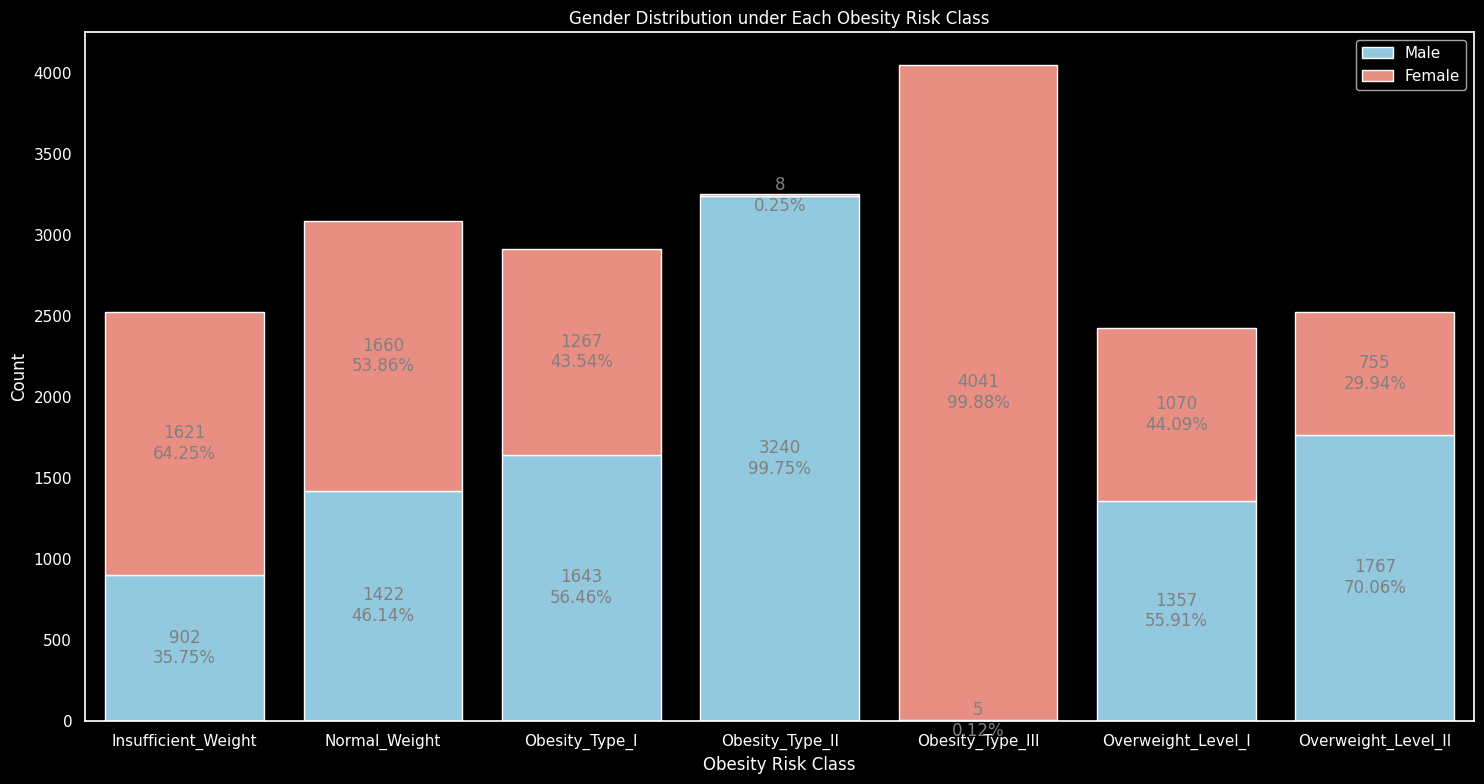

In [78]:
gender_counts = df_train.groupby(['Obesity_Risk', 'Gender']).size().unstack()

gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
sns.set(style='dark', rc={"axes.facecolor": "black", "text.color": "white"})

plt.figure(figsize=(15, 8),facecolor = "black")
sns.barplot(x=gender_percentages.index, y=gender_counts['Male'], color='skyblue', label='Male')
sns.barplot(x=gender_percentages.index, y=gender_counts['Female'], color='salmon', bottom=gender_counts['Male'], label='Female')

for i, class_name in enumerate(gender_percentages.index):
    male_percentage = gender_percentages['Male'][i]
    female_percentage = gender_percentages['Female'][i]
    male_count = gender_counts['Male'][i]
    female_count = gender_counts['Female'][i]

    plt.text(i, male_count / 2, f"{male_count}\n{male_percentage:.2f}%", ha='center', va='center', color='gray')
    plt.text(i, male_count + female_count / 2, f"{female_count}\n{female_percentage:.2f}%", ha='center', va='center', color='gray')

plt.title('Gender Distribution under Each Obesity Risk Class', color='white')
plt.xlabel('Obesity Risk Class', color='white')
plt.ylabel('Count', color='white')
plt.legend()
plt.setp(plt.gca().get_xticklabels(), color='white')
plt.setp(plt.gca().get_yticklabels(), color='white')
plt.setp(plt.gca().get_xaxis().get_label(), color='white')
plt.setp(plt.gca().get_yaxis().get_label(), color='white')
plt.tight_layout()
plt.show()

### Scatter plot

### Pair plot

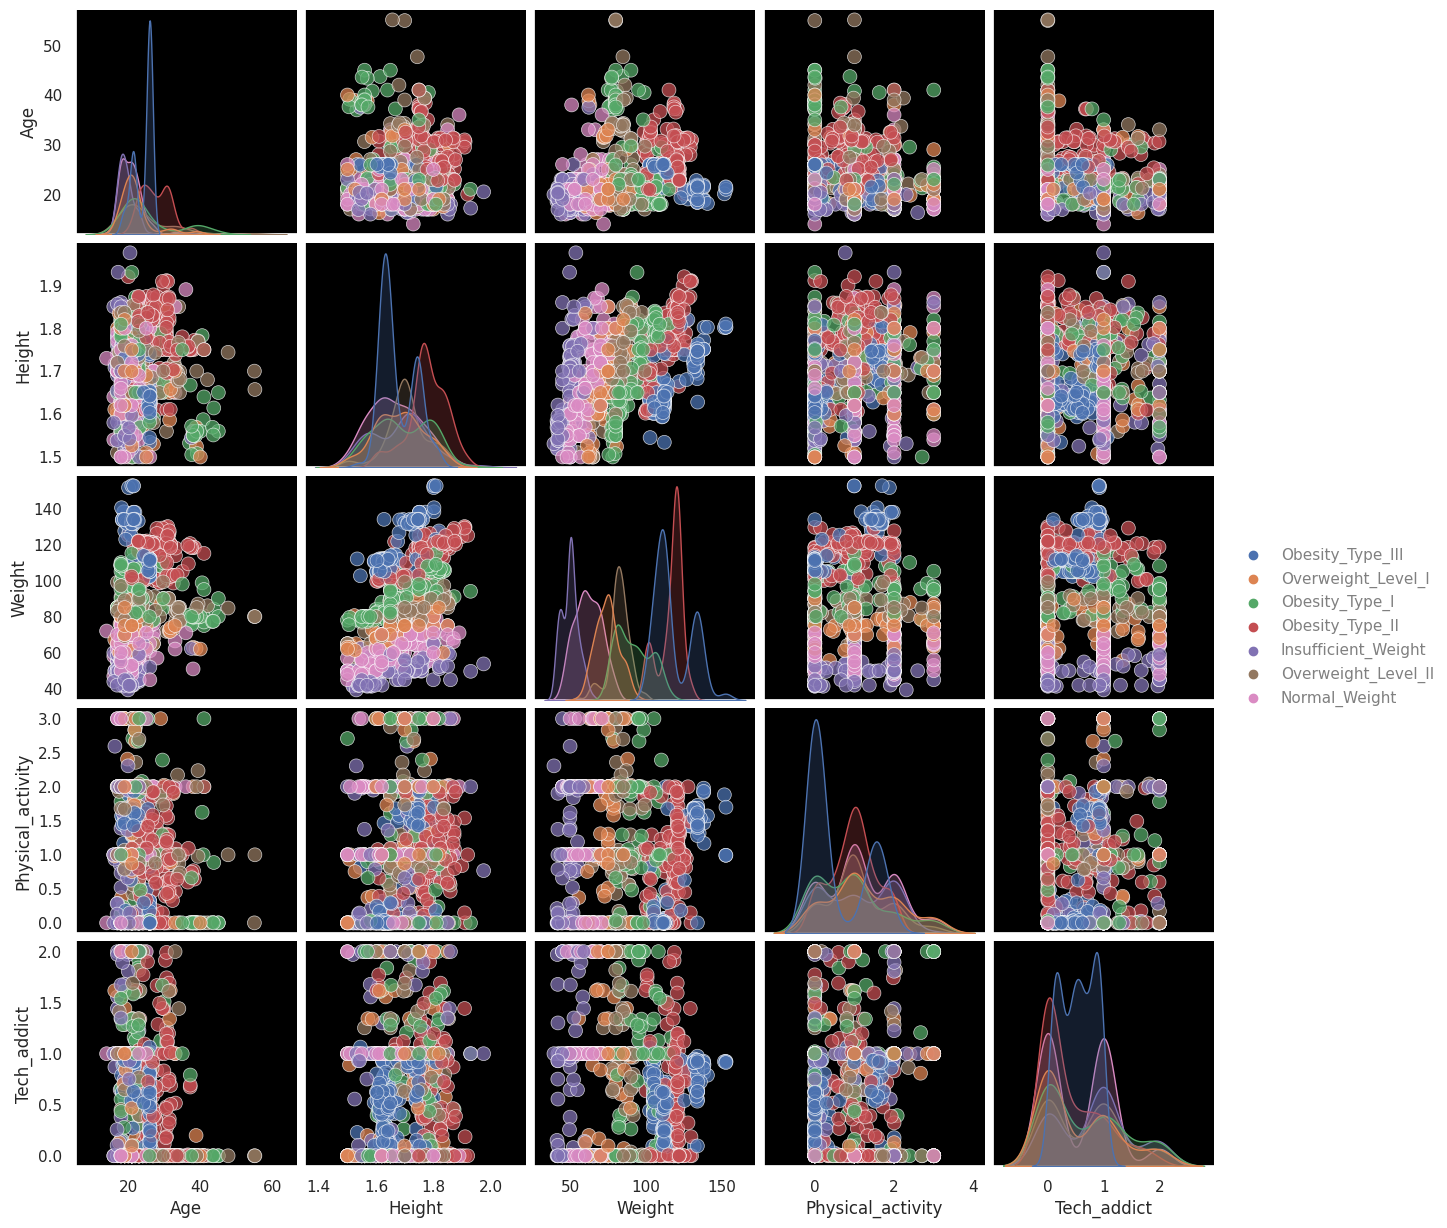

In [79]:
# Sample a subset of the data
sampled_df = df_train.sample(n=1000, random_state=42) 

columns= ['Age', 'Height', 'Weight', 'Physical_activity', 'Tech_addict', 'Obesity_Risk']
df_subset = sampled_df[columns]

"""sns.pairplot(df_subset, kind="scatter", hue="Obesity_Risk", palette="Set2")
plt.show()"""

plot = sns.pairplot(df_subset, kind="scatter", hue="Obesity_Risk", plot_kws=dict(s=100, edgecolor="white", linewidth=.5, alpha = 0.75))
# plot = sns.pairplot(df_subset, kind="kde", hue="Obesity_Risk", palette="Set2")

legend = plot._legend
for text in legend.texts:
    text.set_color('gray')
# plt.tight_layout()


### Raincloud plot

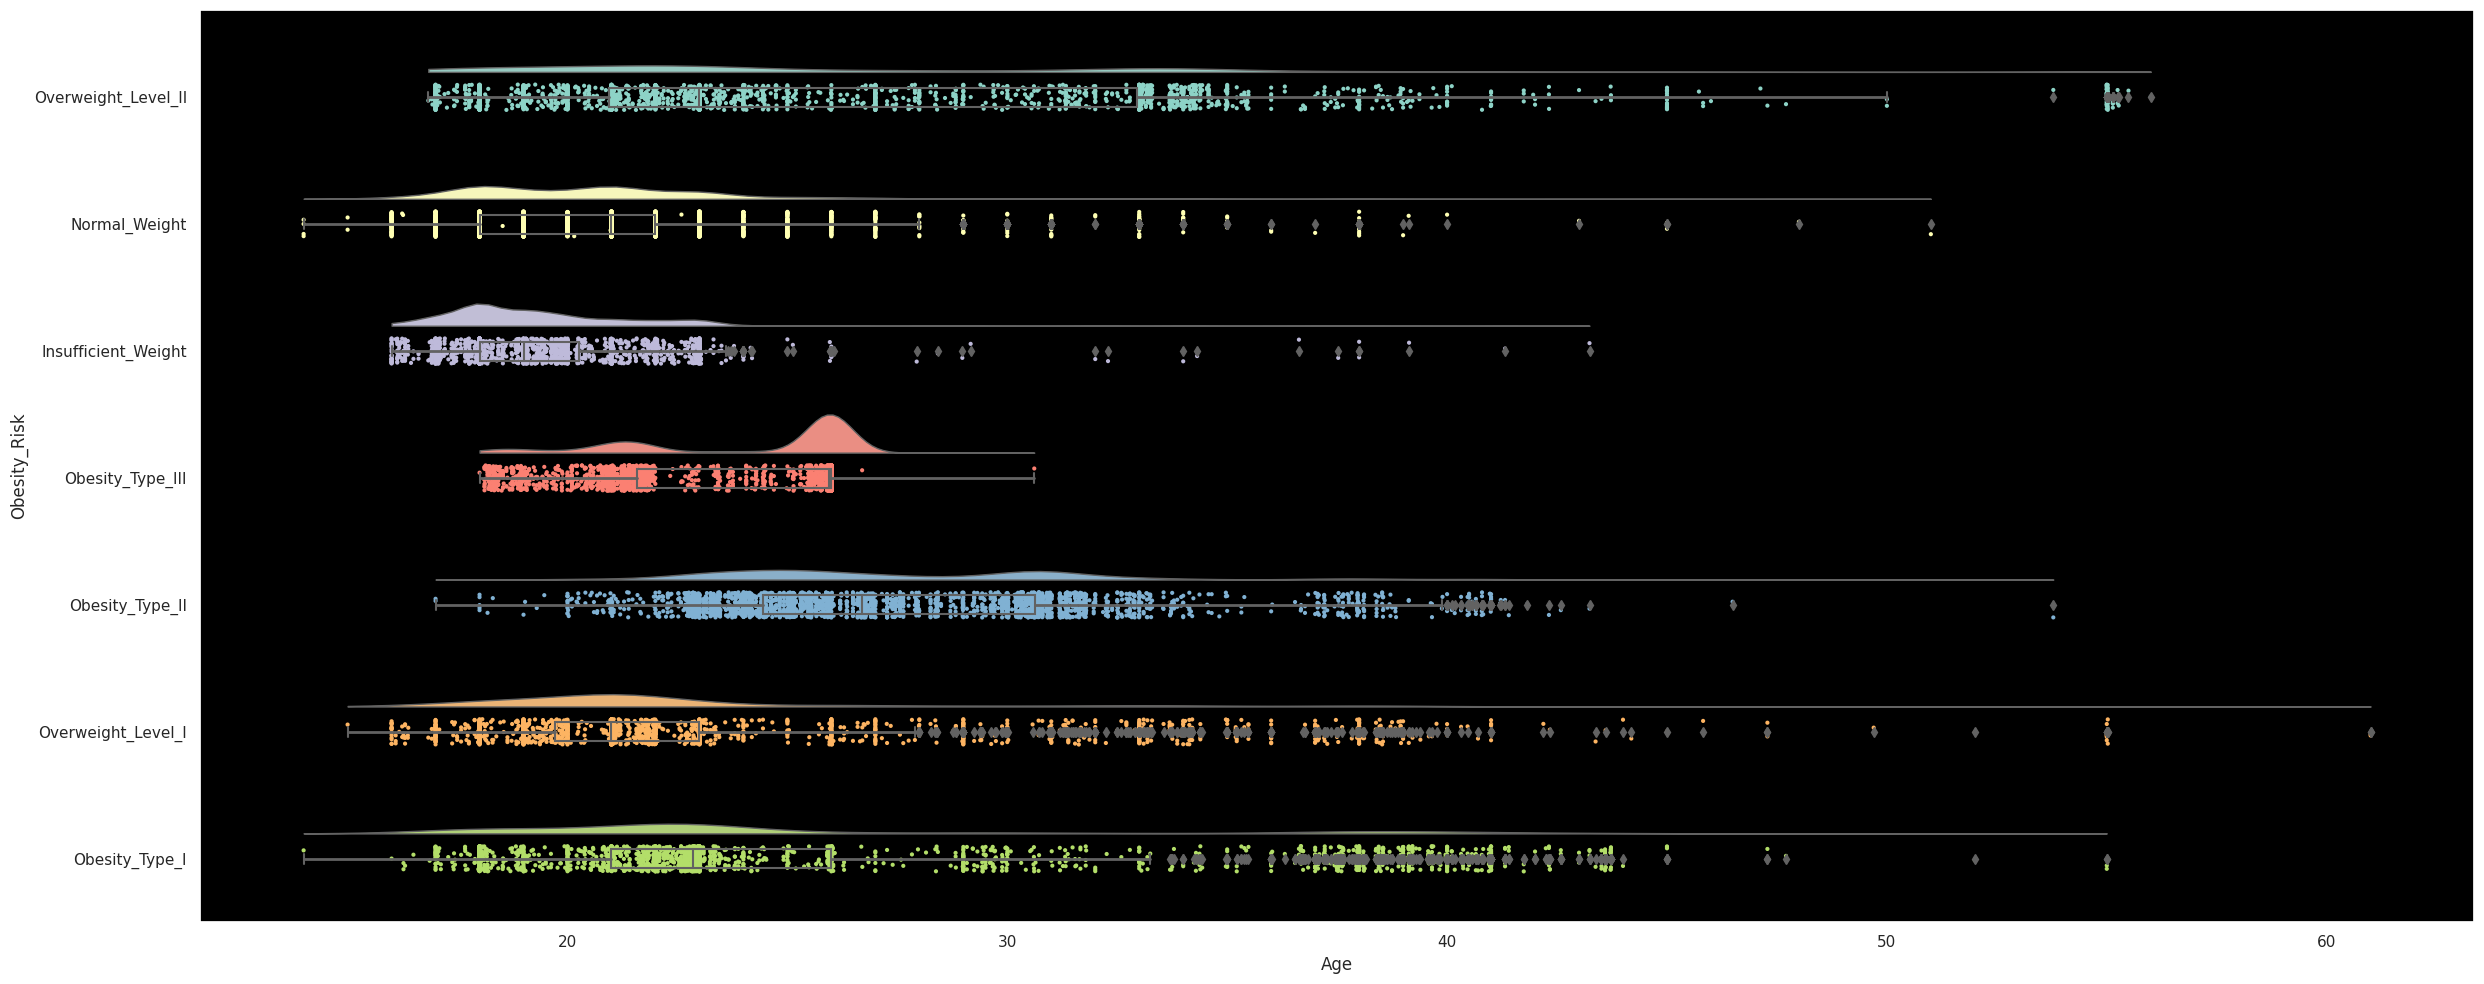

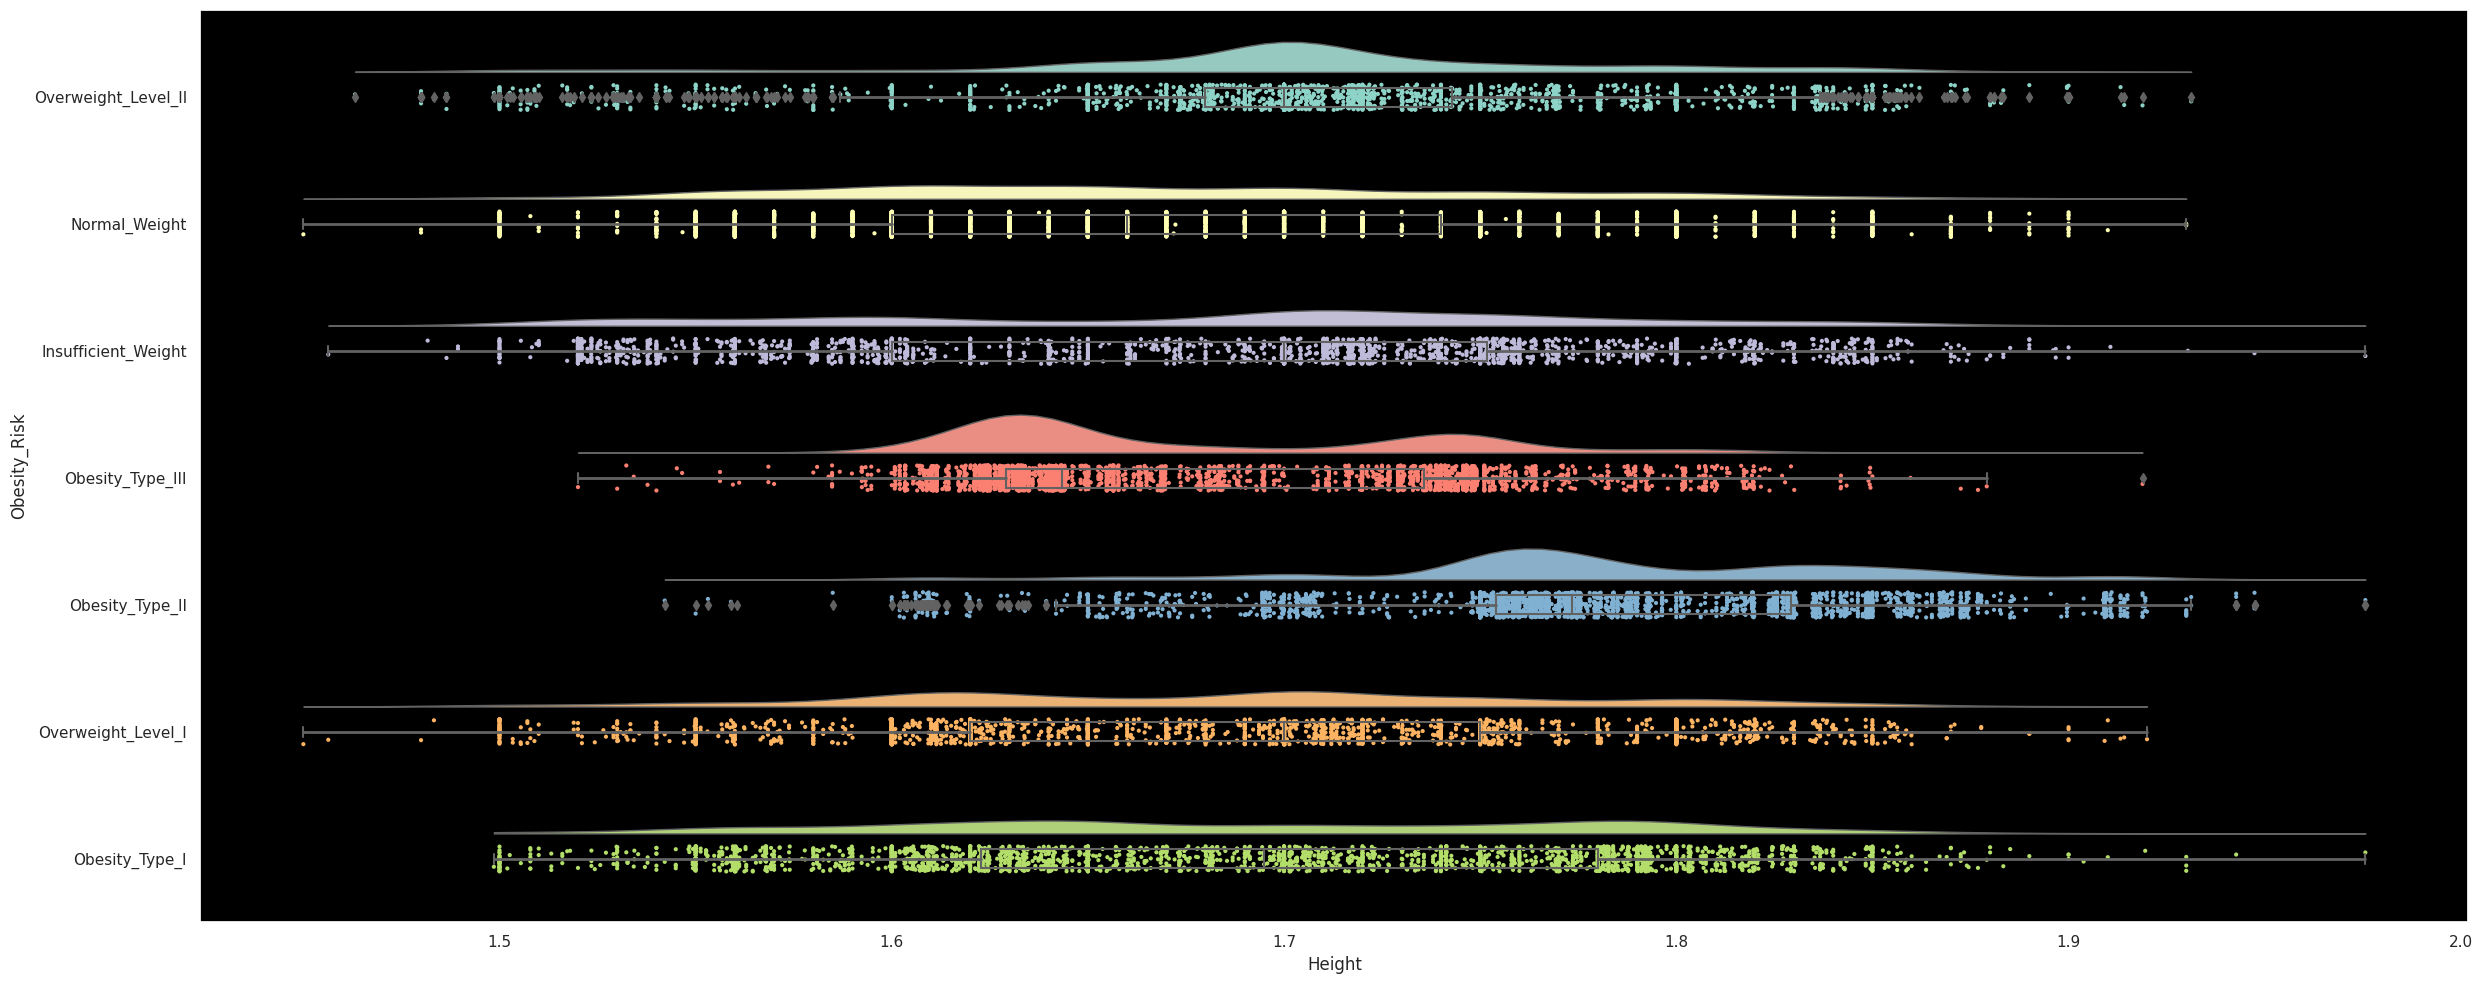

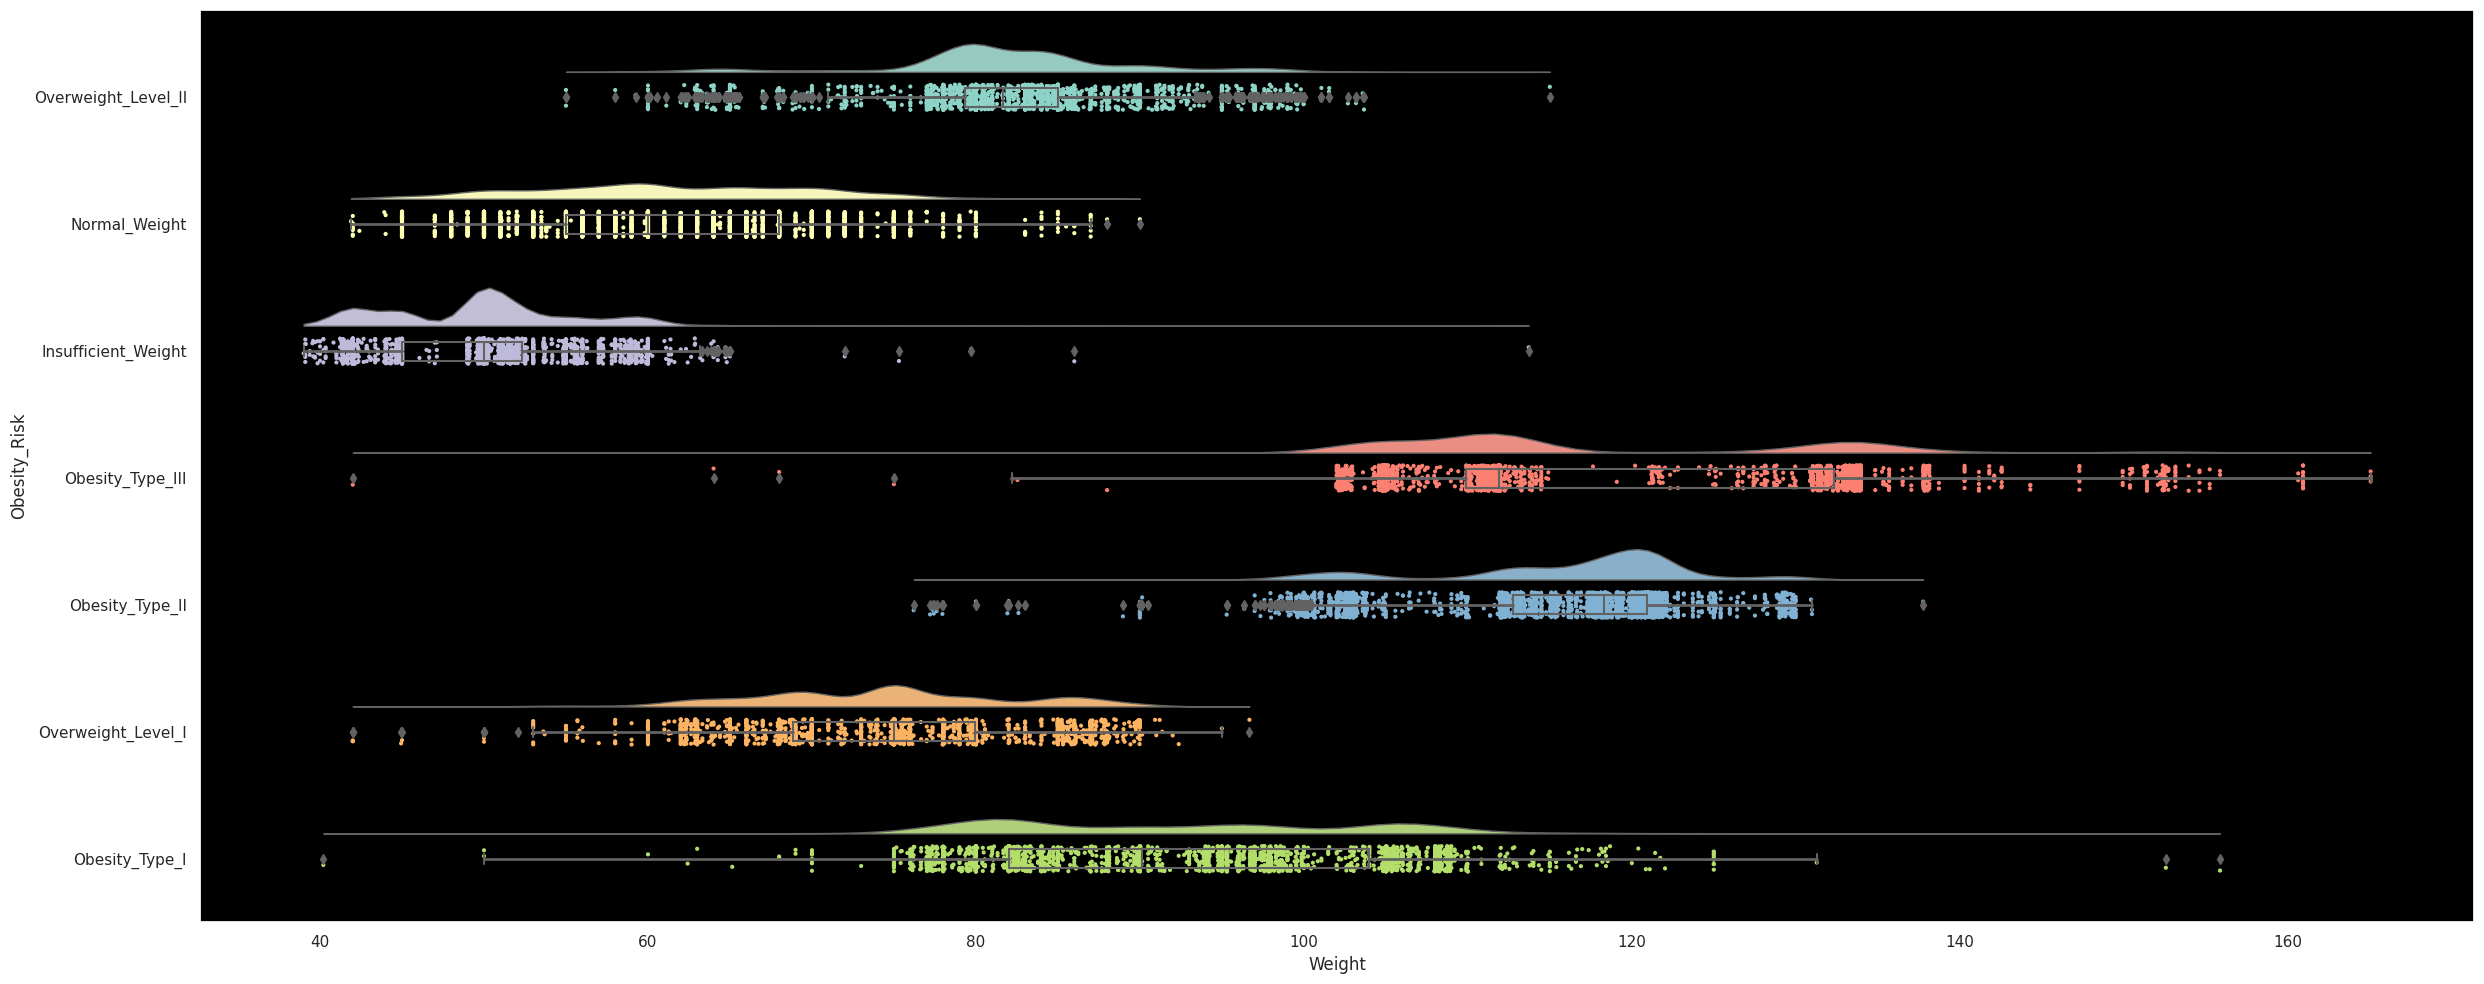

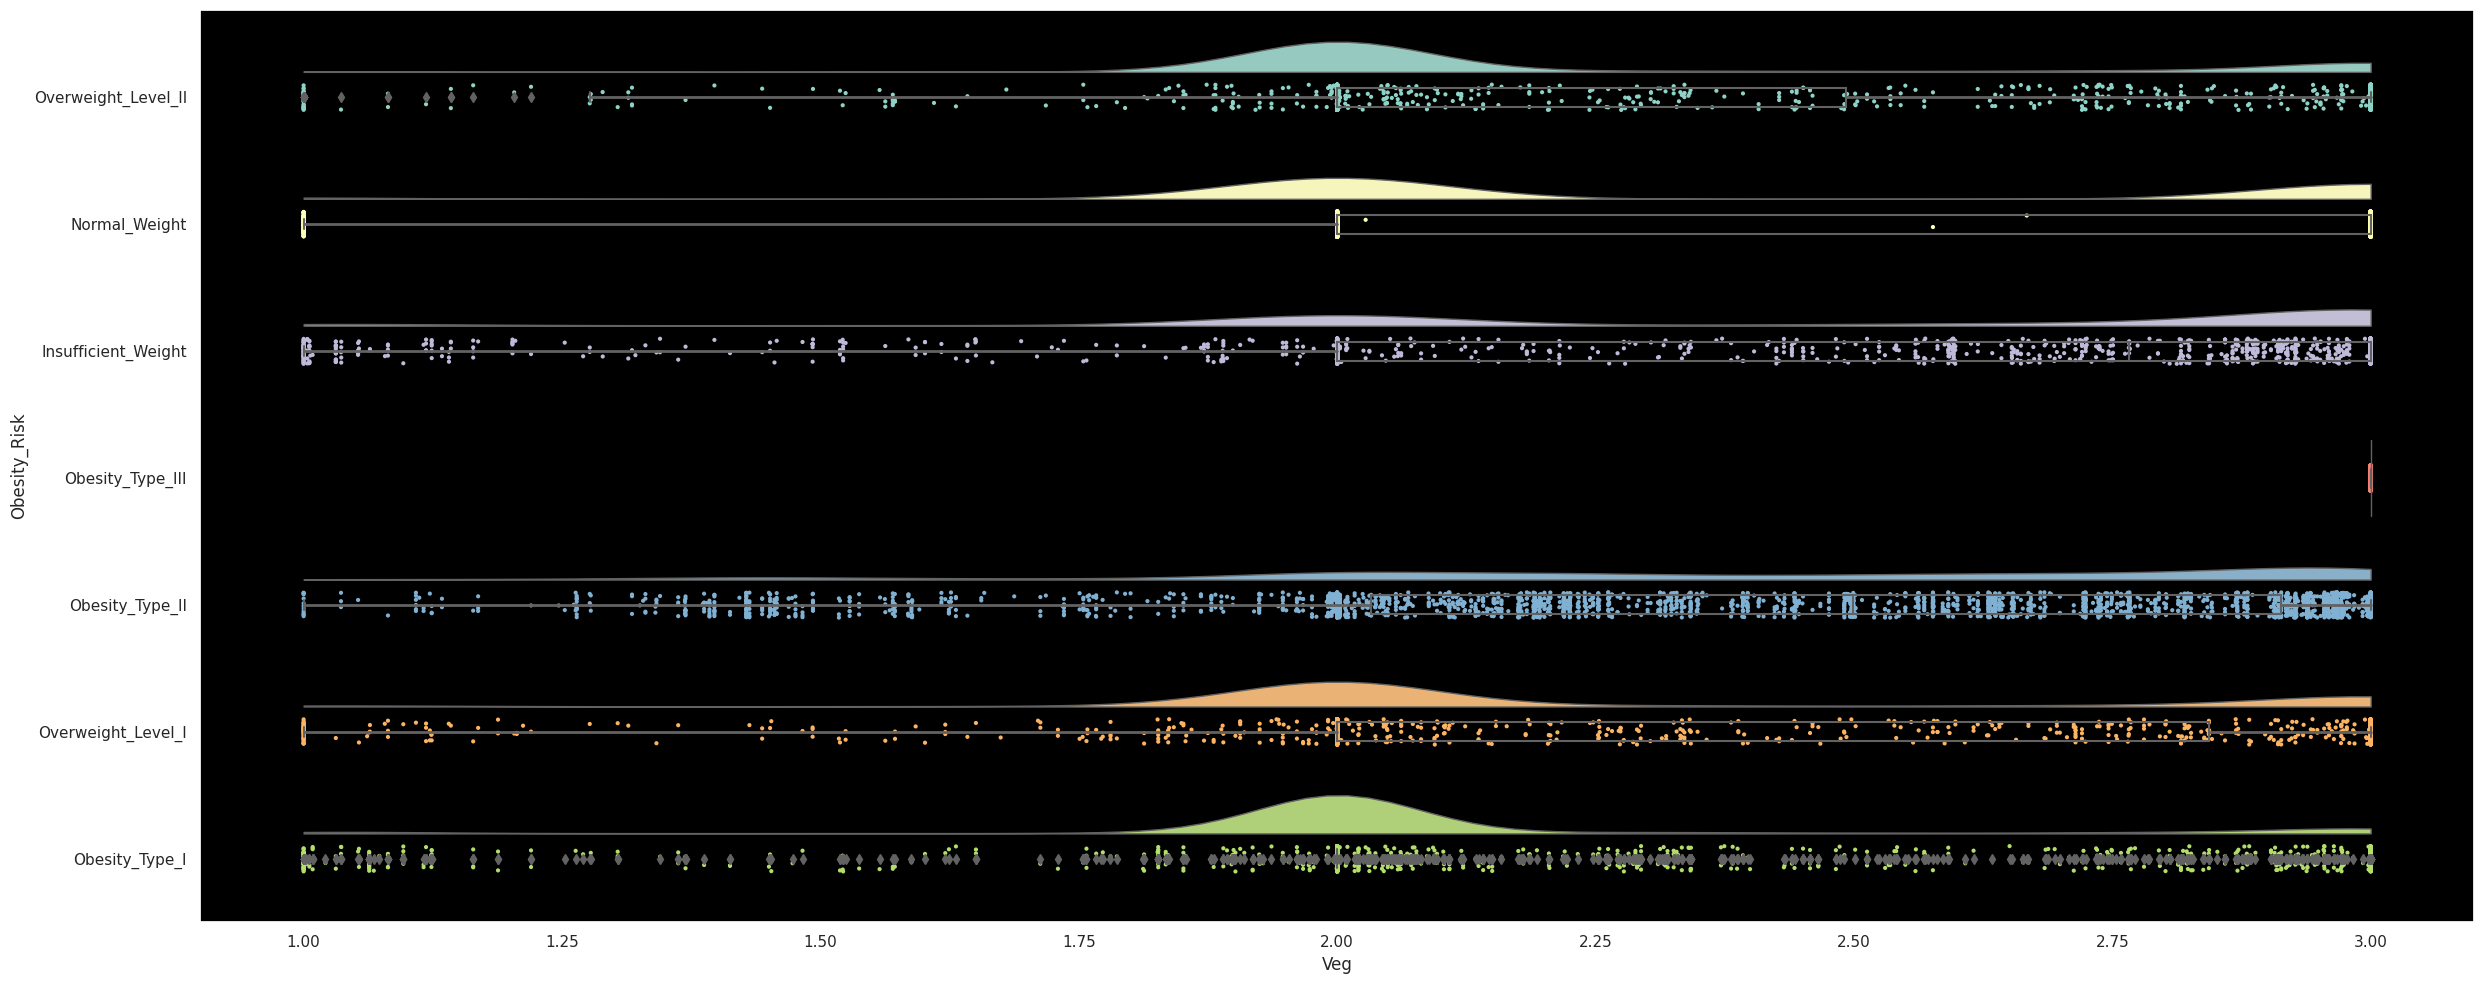

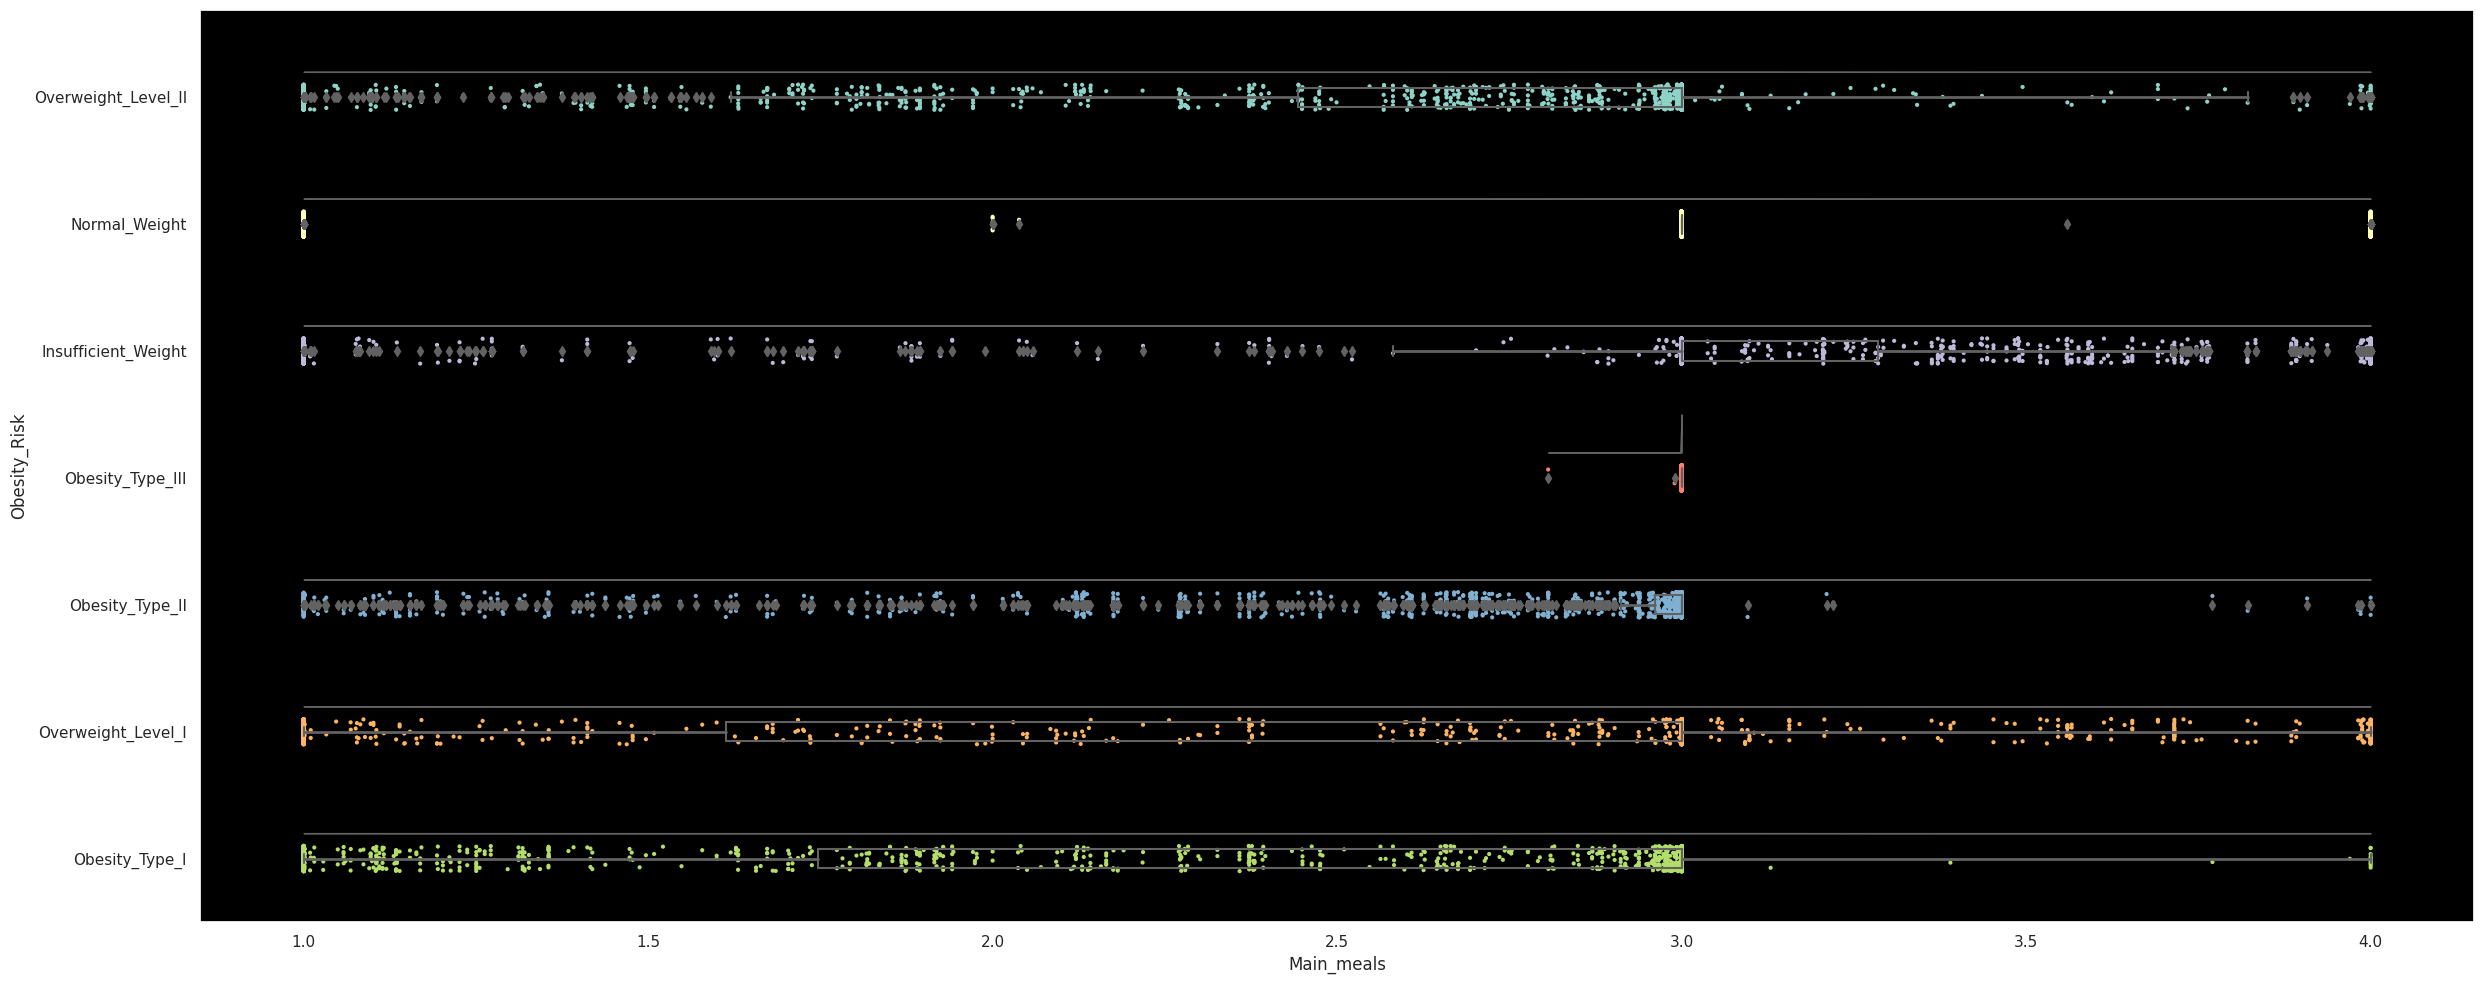

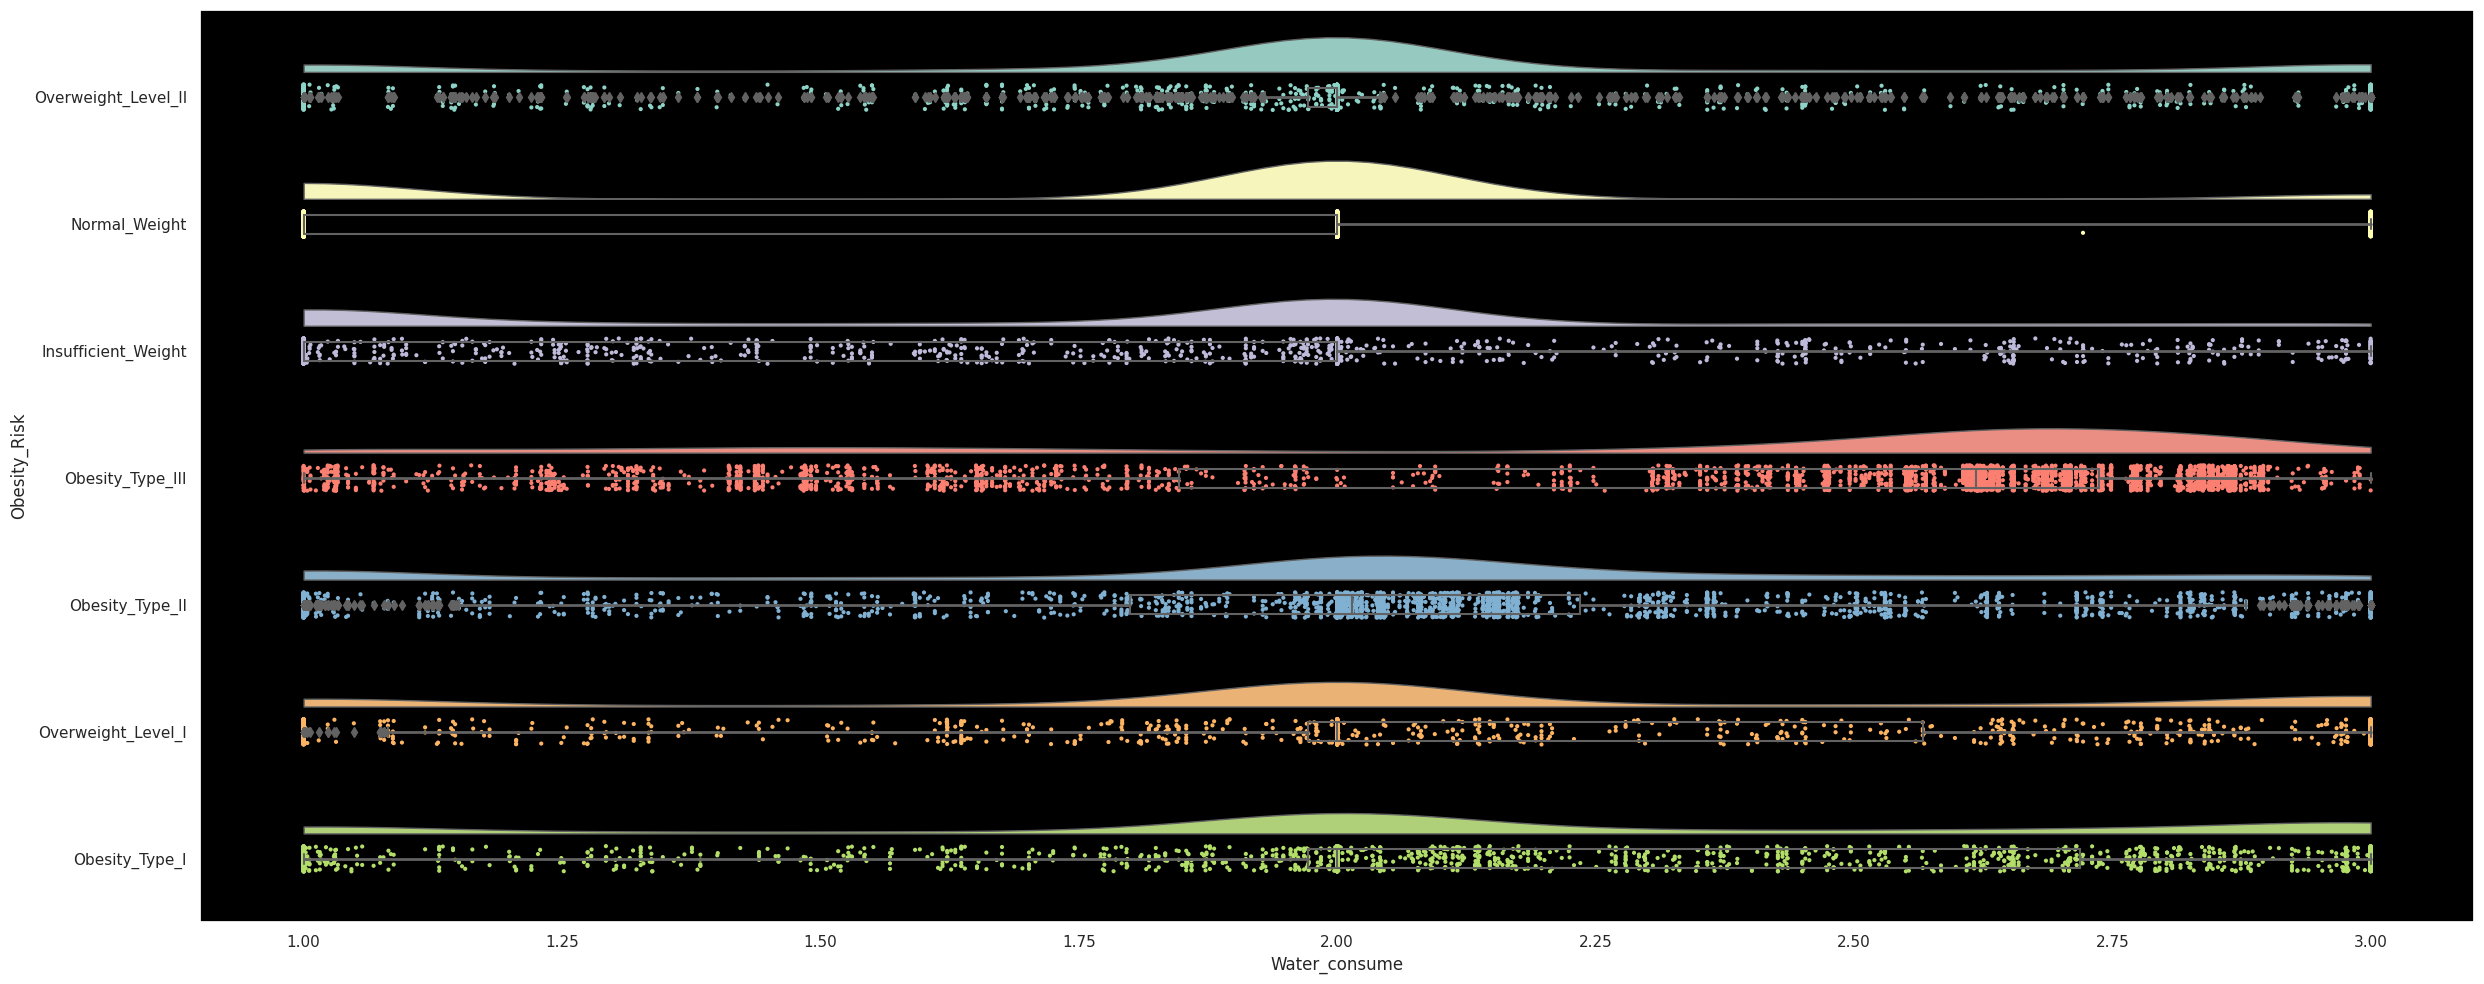

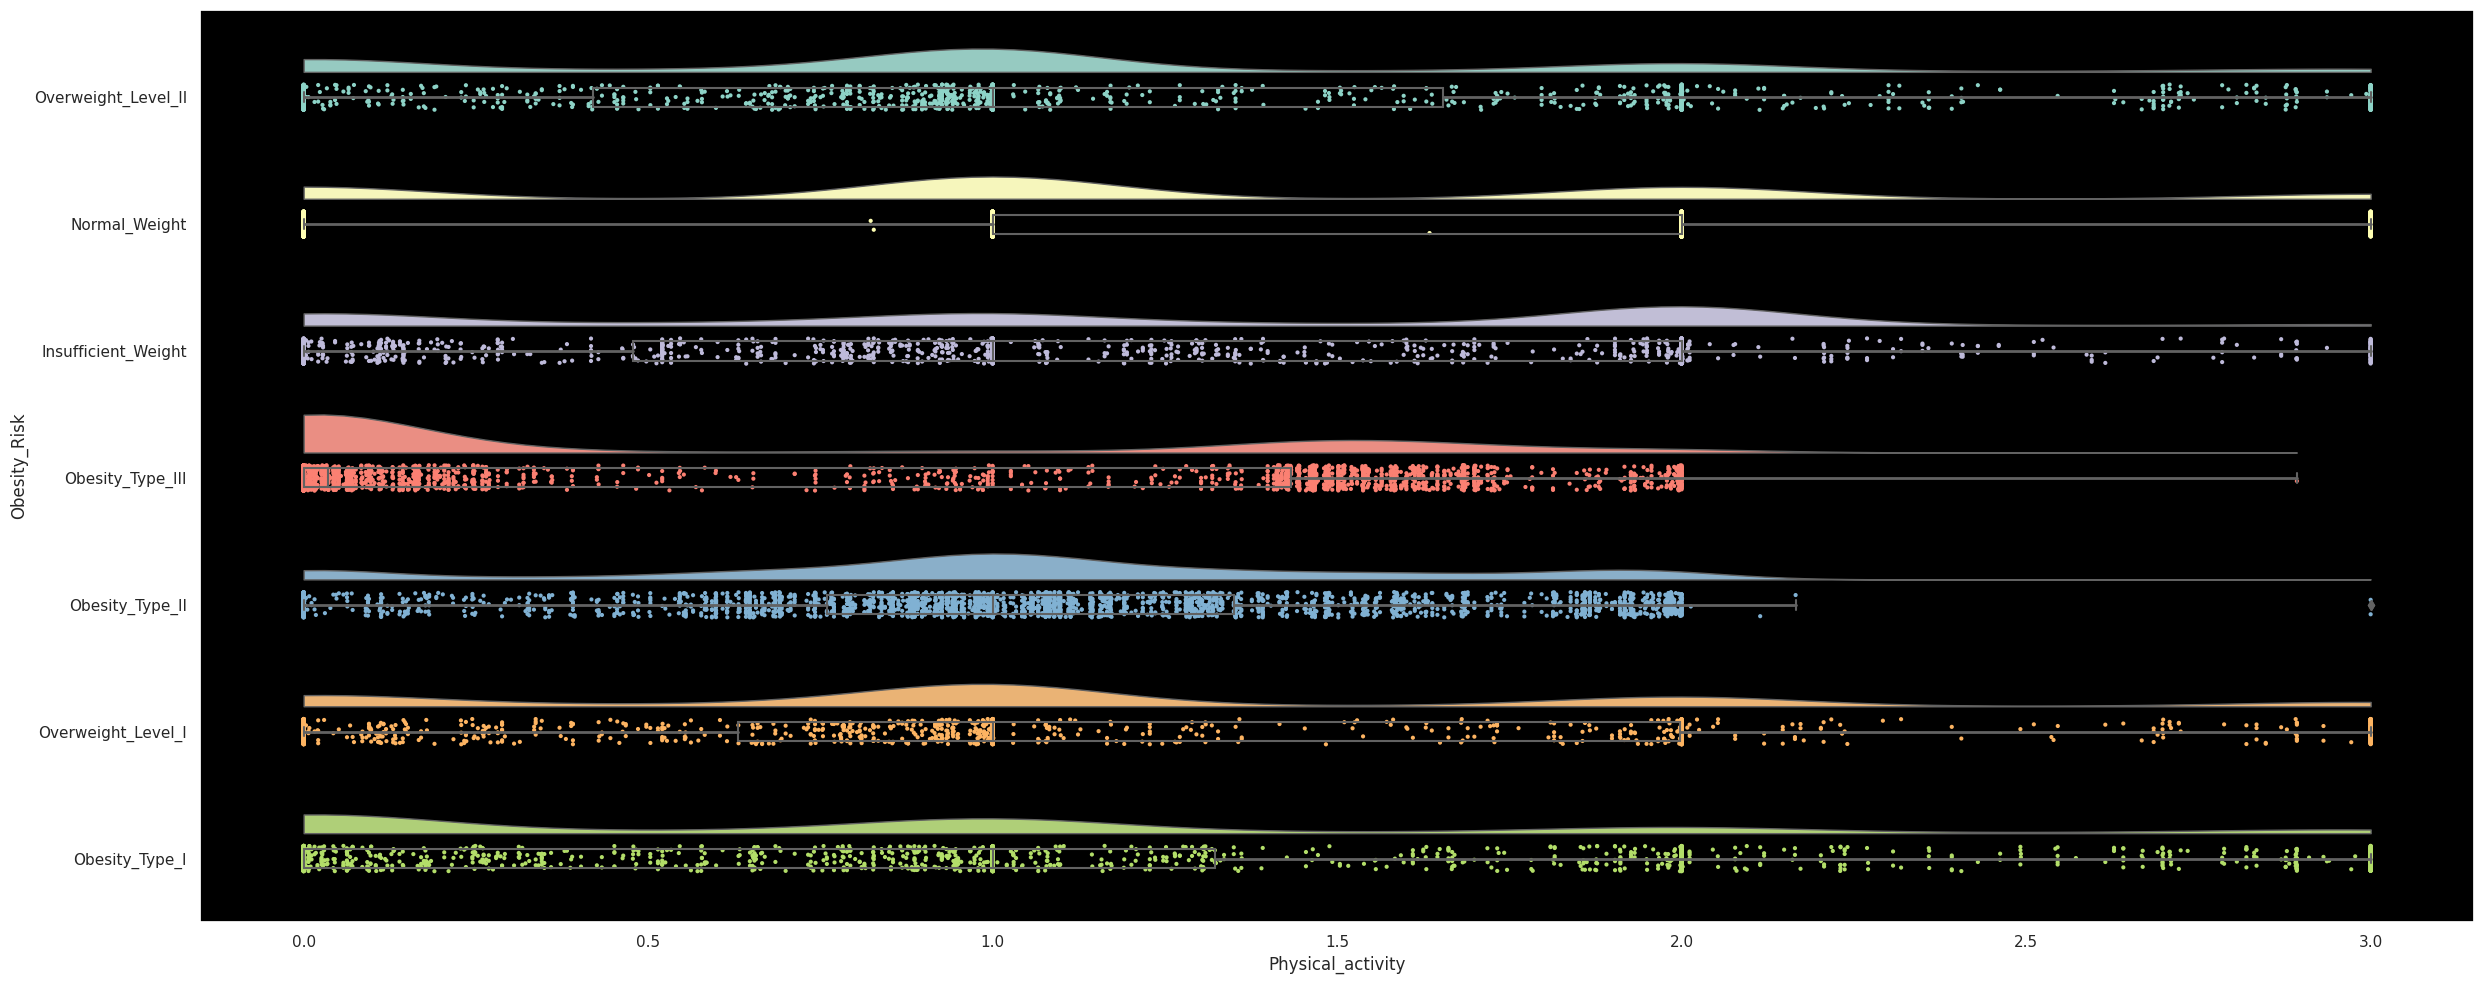

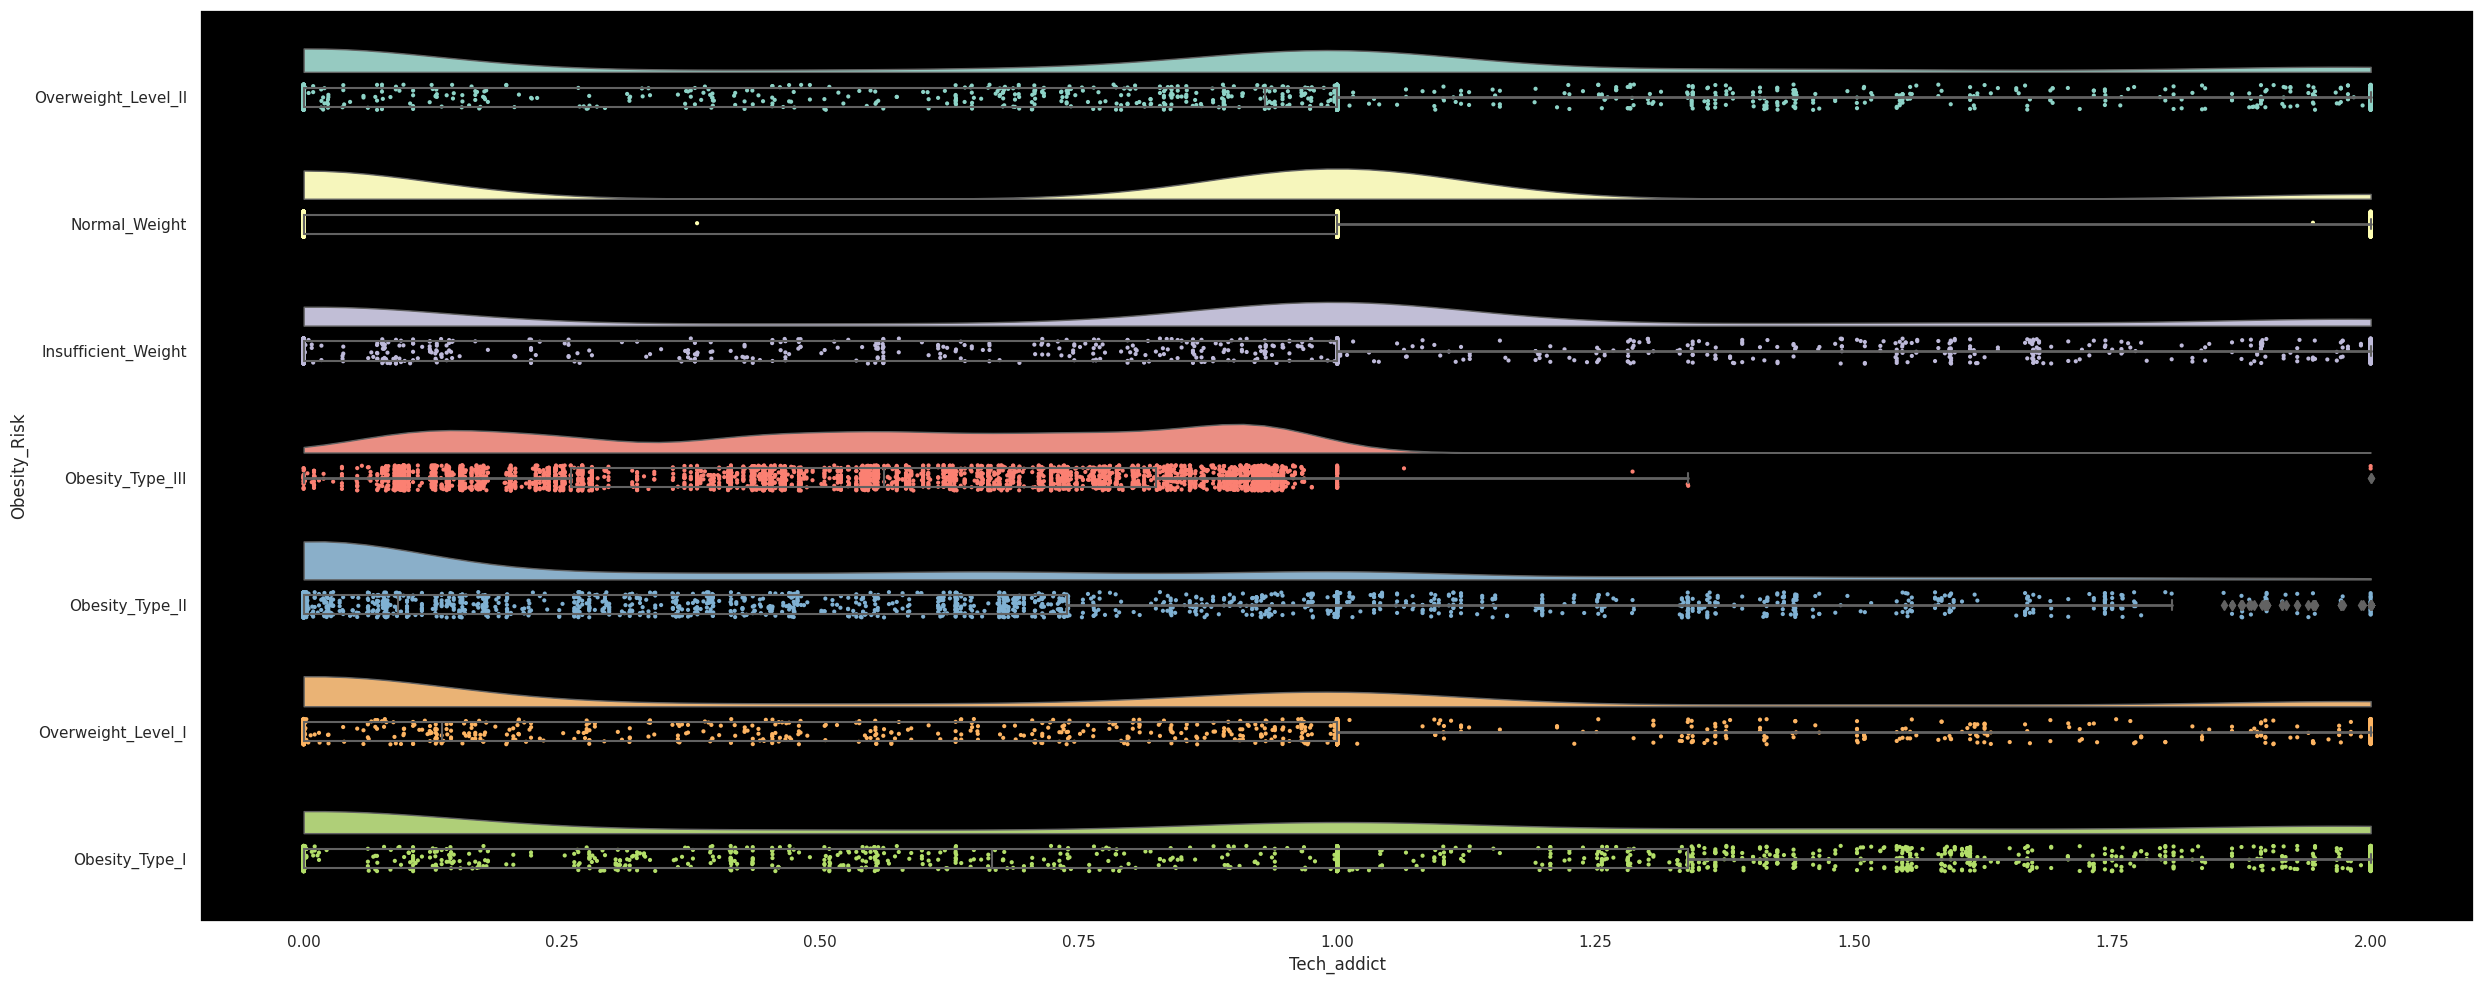

In [80]:
def raincloud(df, dx, dy):
    f, ax = plt.subplots(figsize=(25, 10))
    dy = dy
    dx = dx
    ort = "h"  # Change orientation to vertical
    pal = "Set3"
    sigma = .2

    pt.RainCloud(x=dy, y=dx, data=df, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax, orient=ort)  
#     ax.set_facecolor('#333333')
#     f.set_facecolor('#333333')
#     plt.title("Rainclouds")
    plt.tight_layout()
    plt.show()

for columns in num_cols:
    raincloud(df_train, columns, dy='Obesity_Risk')  

### Heatmap

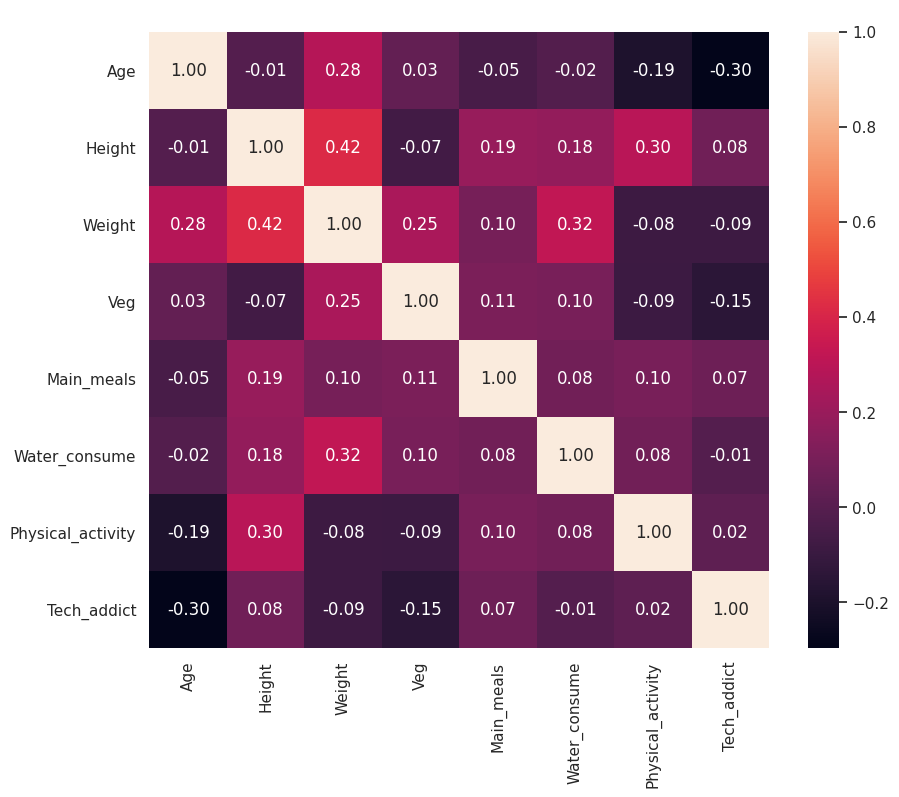

In [81]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_train[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Data Distribution of target column

## 3.2. Preprocessing and feature engineering

In [82]:
train_copy =df_train.copy()
train_copy

Gender        Age    Height      Weight Fam_history Caloric_food  \
0        Male  24.443011  1.699998   81.669950         yes          yes   
1      Female  18.000000  1.560000   57.000000         yes          yes   
2      Female  18.000000  1.711460   50.165754         yes          yes   
3      Female  20.952737  1.710730  131.274851         yes          yes   
4        Male  31.641081  1.914186   93.798055         yes          yes   
...       ...        ...       ...         ...         ...          ...   
20753    Male  25.137087  1.766626  114.187096         yes          yes   
20754    Male  18.000000  1.710000   50.000000          no          yes   
20755    Male  20.101026  1.819557  105.580491         yes          yes   
20756    Male  33.852953  1.700000   83.520113         yes          yes   
20757    Male  26.680376  1.816547  118.134898         yes          yes   

            Veg  Main_meals Foods_betwn_meals Smoker  Water_consume  \
0      2.000000    2.983297         Sometimes     no       2.763573   
1      2.000000    3.000000        Frequently     no       2.000000   
2      1.880534    1.411685         Sometimes     no       1.910378   
3      3.000000    3.000000         Sometimes     no       1.674061   
4      2.679664    1.971472         Sometimes     no       1.979848   
...         ...         ...               ...    ...            ...   
20753  2.919584    3.000000         Sometimes     no       2.151809   
20754  3.000000    4.000000        Frequently     no       1.000000   
20755  2.407817    3.000000         Sometimes     no       2.000000   
20756  2.671238    1.971472         Sometimes     no       2.144838   
20757  3.000000    3.000000         Sometimes     no       2.003563   

      Calories_monitored  Physical_activity  Tech_addict Alcohol_consume  \
0                     no           0.000000     0.976473       Sometimes   
1                     no           1.000000     1.000000              no   
2                     no           0.866045     1.673584              no   
3                     no           1.467863     0.780199       Sometimes   
4                     no           1.967973     0.931721       Sometimes   
...                  ...                ...          ...             ...   
20753                 no           1.330519     0.196680       Sometimes   
20754                 no           2.000000     1.000000       Sometimes   
20755                 no           1.158040     1.198439              no   
20756                 no           0.000000     0.973834              no   
20757                 no           0.684487     0.713823       Sometimes   

                   Transport         Obesity_Risk  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 17 columns]

In [83]:
train_copy["BMI"] = train_copy['Weight']/(train_copy["Height"]**2)
train_copy.drop(["Height","Weight"],axis =1,inplace = True)
train_copy

Gender        Age Fam_history Caloric_food       Veg  Main_meals  \
0        Male  24.443011         yes          yes  2.000000    2.983297   
1      Female  18.000000         yes          yes  2.000000    3.000000   
2      Female  18.000000         yes          yes  1.880534    1.411685   
3      Female  20.952737         yes          yes  3.000000    3.000000   
4        Male  31.641081         yes          yes  2.679664    1.971472   
...       ...        ...         ...          ...       ...         ...   
20753    Male  25.137087         yes          yes  2.919584    3.000000   
20754    Male  18.000000          no          yes  3.000000    4.000000   
20755    Male  20.101026         yes          yes  2.407817    3.000000   
20756    Male  33.852953         yes          yes  2.671238    1.971472   
20757    Male  26.680376         yes          yes  3.000000    3.000000   

      Foods_betwn_meals Smoker  Water_consume Calories_monitored  \
0             Sometimes     no       2.763573                 no   
1            Frequently     no       2.000000                 no   
2             Sometimes     no       1.910378                 no   
3             Sometimes     no       1.674061                 no   
4             Sometimes     no       1.979848                 no   
...                 ...    ...            ...                ...   
20753         Sometimes     no       2.151809                 no   
20754        Frequently     no       1.000000                 no   
20755         Sometimes     no       2.000000                 no   
20756         Sometimes     no       2.144838                 no   
20757         Sometimes     no       2.003563                 no   

       Physical_activity  Tech_addict Alcohol_consume              Transport  \
0               0.000000     0.976473       Sometimes  Public_Transportation   
1               1.000000     1.000000              no             Automobile   
2               0.866045     1.673584              no  Public_Transportation   
3               1.467863     0.780199       Sometimes  Public_Transportation   
4               1.967973     0.931721       Sometimes  Public_Transportation   
...                  ...          ...             ...                    ...   
20753           1.330519     0.196680       Sometimes  Public_Transportation   
20754           2.000000     1.000000       Sometimes  Public_Transportation   
20755           1.158040     1.198439              no  Public_Transportation   
20756           0.000000     0.973834              no             Automobile   
20757           0.684487     0.713823       Sometimes  Public_Transportation   

              Obesity_Risk        BMI  
0      Overweight_Level_II  28.259565  
1            Normal_Weight  23.422091  
2      Insufficient_Weight  17.126706  
3         Obesity_Type_III  44.855798  
4      Overweight_Level_II  25.599151  
...                    ...        ...  
20753      Obesity_Type_II  36.587084  
20754  Insufficient_Weight  17.099278  
20755      Obesity_Type_II  31.889841  
20756  Overweight_Level_II  28.899693  
20757      Obesity_Type_II  35.800157  

[20758 rows x 16 columns]

In [84]:
cat_cols = [ cols for cols in train_copy.columns if train_copy[cols].dtype == 'object' ]
num_cols = [ cols for cols in train_copy.columns if train_copy[cols].dtype != 'object' ]

### Outliers

In [85]:
# Check for outliers in the data
def check_outliers(data, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
        # Define lower and upper thresholds
        lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
        # Find outliers
        outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")


check_outliers(train_copy, num_cols)

Age
Number of outliers: 1074

Veg
Number of outliers: 0

Main_meals
Number of outliers: 6052

Water_consume
Number of outliers: 0

Physical_activity
Number of outliers: 0

Tech_addict
Number of outliers: 0

BMI
Number of outliers: 0



In [86]:
train_copy["Age"].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

# To do list
- modify the scatter plot
- categorize the age and main meals column?
- violin plot for binary categories